In [1]:
#perform a simple neural network using any data set
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=
['accuracy'])
history = model.fit(x_train, y_train, epochs=2,
validation_data=(x_test, y_test))


170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/2
1563/1563 [==============================] - 65s 41ms/step - loss: 1.5312 - accuracy: 0.4471 - val_loss: 1.2494 - val_accuracy: 0.5534
Epoch 2/2
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1539 - accuracy: 0.5930 - val_loss: 1.0841 - val_accuracy: 0.6197


313/313 - 7s - loss: 1.0841 - accuracy: 0.6197 - 7s/epoch - 22ms/step
Test accuracy: 0.619700014591217


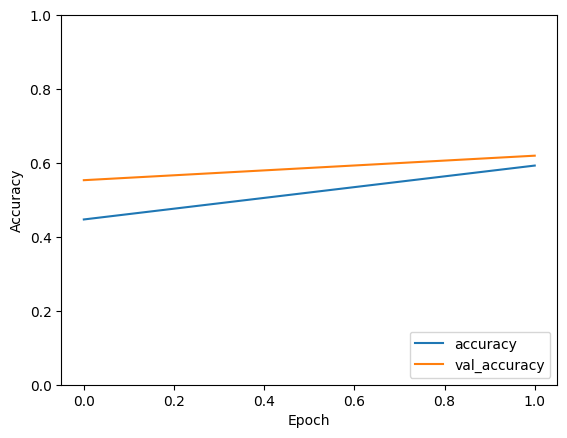

In [3]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')
